In [4]:

#import dependencies
import csv
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [5]:
#read in zip csv's
zip30312 = "30312_weather_traffic_FINAL.csv"
zip30339 = "30339_weather_traffic_FINAL.csv"
zip30331 = "30331_weather_traffic_FINAL.csv"
zip30315 = "30315_weather_traffic_FINAL.csv"
zip30309 = "30309_weather_traffic_FINAL.csv"
zip30340 = "30340_weather_traffic_FINAL.csv"
zip30308 = "30308_weather_traffic_FINAL.csv"
zip30324 = "30324_weather_traffic_FINAL.csv"
zip30342 = "30342_weather_traffic_FINAL.csv"
zip30318 = "30318_weather_traffic_FINAL.csv"

zip30312_df = pd.read_csv(zip30312)
zip30339_df = pd.read_csv(zip30339)
zip30331_df = pd.read_csv(zip30331)
zip30315_df = pd.read_csv(zip30315)
zip30309_df = pd.read_csv(zip30309)
zip30340_df = pd.read_csv(zip30340)
zip30308_df = pd.read_csv(zip30308)
zip30324_df = pd.read_csv(zip30324)
zip30342_df = pd.read_csv(zip30342)
zip30318_df = pd.read_csv(zip30318)

zip30312_df.head()

,Unnamed: 0,Location,Address,Country,Date,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,...,Relative Humidity,Conditions,Severity_1,Severity_2,Severity_3,Severity_4,Residential_ct,Interstate_ct,Accident_ct,Zipcode
0,0,NaN,30312,USA,01/01/2019,65.1,56.4,61.5,NaN,NaN,...,90.30,"Rain, Partially cloudy",0,0,2,0,1,1,2,30312
1,1,NaN,30312,USA,01/02/2019,57.0,49.0,52.4,46.3,NaN,...,91.80,"Rain, Overcast",0,0,1,0,0,1,1,30312
2,2,NaN,30312,USA,01/03/2019,54.3,50.1,52.5,NaN,NaN,...,95.95,"Rain, Overcast",0,2,2,0,1,3,4,30312
3,3,NaN,30312,USA,01/04/2019,64.8,45.1,54.5,40.1,NaN,...,86.19,"Rain, Overcast",0,0,4,0,3,1,4,30312
4,4,NaN,30312,USA,01/05/2019,57.8,43.7,48.8,36.4,NaN,...,64.92,Partially cloudy,0,0,2,0,1,1,2,30312


In [41]:
# accident with high wind 
HiWind30312 = zip30312_df.loc[zip30312_df['Wind Speed'] > 9,['Wind Speed','Accident_ct']]
HiWind30339 = zip30339_df.loc[zip30339_df['Wind Speed'] > 9,['Wind Speed','Accident_ct']]
HiWind30331 = zip30331_df.loc[zip30331_df['Wind Speed'] > 9,['Wind Speed','Accident_ct']]
HiWind30315 = zip30315_df.loc[zip30315_df['Wind Speed'] > 9,['Wind Speed','Accident_ct']]
HiWind30309 = zip30309_df.loc[zip30309_df['Wind Speed'] > 9,['Wind Speed','Accident_ct']]
HiWind30340 = zip30340_df.loc[zip30340_df['Wind Speed'] > 9,['Wind Speed','Accident_ct']]
HiWind30308 = zip30308_df.loc[zip30308_df['Wind Speed'] > 9,['Wind Speed','Accident_ct']]
HiWind30324 = zip30324_df.loc[zip30324_df['Wind Speed'] > 9,['Wind Speed','Accident_ct']]
HiWind30342 = zip30342_df.loc[zip30342_df['Wind Speed'] > 9,['Wind Speed','Accident_ct']]
HiWind30318 = zip30318_df.loc[zip30318_df['Wind Speed'] > 9,['Wind Speed','Accident_ct']]
HiWind30312.head()

# accident with low wind 
LoWind30312 = zip30312_df.loc[zip30312_df['Wind Speed'] < 9,['Wind Speed','Accident_ct']]
LoWind30339 = zip30339_df.loc[zip30339_df['Wind Speed'] < 9,['Wind Speed','Accident_ct']]
LoWind30331 = zip30331_df.loc[zip30331_df['Wind Speed'] < 9,['Wind Speed','Accident_ct']]
LoWind30315 = zip30315_df.loc[zip30315_df['Wind Speed'] < 9,['Wind Speed','Accident_ct']]
LoWind30309 = zip30309_df.loc[zip30309_df['Wind Speed'] < 9,['Wind Speed','Accident_ct']]
LoWind30340 = zip30340_df.loc[zip30340_df['Wind Speed'] < 9,['Wind Speed','Accident_ct']]
LoWind30308 = zip30308_df.loc[zip30308_df['Wind Speed'] < 9,['Wind Speed','Accident_ct']]
LoWind30324 = zip30324_df.loc[zip30324_df['Wind Speed'] < 9,['Wind Speed','Accident_ct']]
LoWind30342 = zip30342_df.loc[zip30342_df['Wind Speed'] < 9,['Wind Speed','Accident_ct']]
LoWind30318 = zip30318_df.loc[zip30318_df['Wind Speed'] < 9,['Wind Speed','Accident_ct']]


The correlation between High Wind Speed and accidents for zip code 30312 is 11.0%
slope: 0.084232  intercept: 1.604812
R-Squared: 0.012114
The correlation between Low Wind Speed and accidents for zip code 30312 is -11.0%
slope: -0.230286  intercept: 4.302844
R-Squared: 0.012598


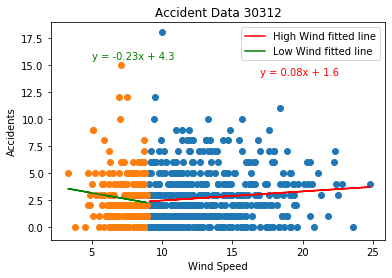

In [46]:
# high wind 30312
(slope, intercept, rvalue, pvalue, stderr) = linregress(HiWind30312['Wind Speed'], HiWind30312['Accident_ct'])
regress_values = slope * HiWind30312['Wind Speed'] + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(HiWind30312['Wind Speed'], HiWind30312['Accident_ct'])
plt.plot(HiWind30312['Wind Speed'], regress_values, color = 'red',label = "High Wind fitted line")
plt.legend()
plt.annotate(line_eq,(17,14),fontsize=10,color="red")
plt.xlabel("Wind Speed")
plt.ylabel("Accidents")
plt.title("Accident Data 30312")
corr=round(st.pearsonr(HiWind30312['Wind Speed'], HiWind30312['Accident_ct'])[0],2)*100
print(f"The correlation between High Wind Speed and accidents for zip code 30312 is {corr}%")
print ("slope: %f  intercept: %f" % (slope, intercept))
print("R-Squared: %f" % rvalue**2)

#low wind 30312

(slope, intercept, rvalue, pvalue, stderr) = linregress(LoWind30312['Wind Speed'], LoWind30312['Accident_ct'])
regress_values = slope * LoWind30312['Wind Speed'] + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(LoWind30312['Wind Speed'], LoWind30312['Accident_ct'])
plt.plot(LoWind30312['Wind Speed'], regress_values, color = 'green',label = "Low Wind fitted line")
plt.legend()
plt.annotate(line_eq,(5,15.5),fontsize=10,color="green")
plt.xlabel("Wind Speed")
plt.ylabel("Accidents")
plt.title("Accident Data 30312")
corr=round(st.pearsonr(LoWind30312['Wind Speed'], LoWind30312['Accident_ct'])[0],2)*100
print(f"The correlation between Low Wind Speed and accidents for zip code 30312 is {corr}%")
print ("slope: %f  intercept: %f" % (slope, intercept))
print("R-Squared: %f" % rvalue**2)

The correlation between High Wind Speed and accidents for zip code 30339 is 12.0%
slope: 0.070179  intercept: 0.634605
R-Squared: 0.013440
The correlation between Low Wind Speed and accidents for zip code 30339 is 8.0%
slope: 0.124611  intercept: 0.608865
R-Squared: 0.006991


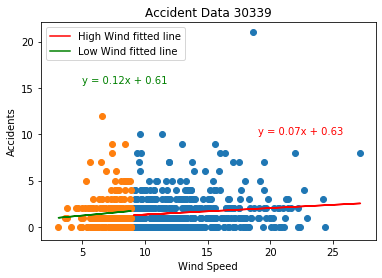

In [51]:
# high wind 30339
(slope, intercept, rvalue, pvalue, stderr) = linregress(HiWind30339['Wind Speed'], HiWind30339['Accident_ct'])
regress_values = slope * HiWind30339['Wind Speed'] + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(HiWind30339['Wind Speed'], HiWind30339['Accident_ct'])
plt.plot(HiWind30339['Wind Speed'], regress_values, color = 'red',label = "High Wind fitted line")
plt.legend()
plt.annotate(line_eq,(19,10),fontsize=10,color="red")
plt.xlabel("Wind Speed")
plt.ylabel("Accidents")
plt.title("Accident Data 30339")
corr=round(st.pearsonr(HiWind30339['Wind Speed'], HiWind30339['Accident_ct'])[0],2)*100
print(f"The correlation between High Wind Speed and accidents for zip code 30339 is {corr}%")
print ("slope: %f  intercept: %f" % (slope, intercept))
print("R-Squared: %f" % rvalue**2)

#low wind 30339
(slope, intercept, rvalue, pvalue, stderr) = linregress(LoWind30339['Wind Speed'], LoWind30339['Accident_ct'])
regress_values = slope * LoWind30339['Wind Speed'] + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(LoWind30339['Wind Speed'], LoWind30339['Accident_ct'])
plt.plot(LoWind30339['Wind Speed'], regress_values, color = 'green',label = "Low Wind fitted line")
plt.legend()
plt.annotate(line_eq,(5,15.5),fontsize=10,color="green")
plt.xlabel("Wind Speed")
plt.ylabel("Accidents")
plt.title("Accident Data 30339")
corr=round(st.pearsonr(LoWind30339['Wind Speed'], LoWind30339['Accident_ct'])[0],2)*100
print(f"The correlation between Low Wind Speed and accidents for zip code 30339 is {corr}%")
print ("slope: %f  intercept: %f" % (slope, intercept))
print("R-Squared: %f" % rvalue**2)

The correlation between High Wind Speed and accidents for zip code 30331 is 6.0%
slope: 0.031879  intercept: 1.251629
R-Squared: 0.003990
The correlation between Low Wind Speed and accidents for zip code 30331 is 5.0%
slope: 0.073512  intercept: 1.203669
R-Squared: 0.002301


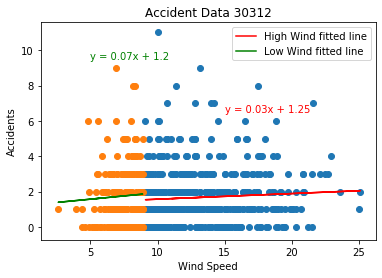

In [57]:
# high wind 30331
(slope, intercept, rvalue, pvalue, stderr) = linregress(HiWind30331['Wind Speed'], HiWind30331['Accident_ct'])
regress_values = slope * HiWind30331['Wind Speed'] + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(HiWind30331['Wind Speed'], HiWind30331['Accident_ct'])
plt.plot(HiWind30331['Wind Speed'], regress_values, color = 'red',label = "High Wind fitted line")
plt.legend()
plt.annotate(line_eq,(15,6.5),fontsize=10,color="red")
plt.xlabel("Wind Speed")
plt.ylabel("Accidents")
plt.title("Accident Data 30331")
corr=round(st.pearsonr(HiWind30331['Wind Speed'], HiWind30331['Accident_ct'])[0],2)*100
print(f"The correlation between High Wind Speed and accidents for zip code 30331 is {corr}%")
print ("slope: %f  intercept: %f" % (slope, intercept))
print("R-Squared: %f" % rvalue**2)

# low wing 30331
(slope, intercept, rvalue, pvalue, stderr) = linregress(LoWind30331['Wind Speed'], LoWind30331['Accident_ct'])
regress_values = slope * LoWind30331['Wind Speed'] + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(LoWind30331['Wind Speed'], LoWind30331['Accident_ct'])
plt.plot(LoWind30331['Wind Speed'], regress_values, color = 'green',label = "Low Wind fitted line")
plt.legend()
plt.annotate(line_eq,(5,9.5),fontsize=10,color="green")
plt.xlabel("Wind Speed")
plt.ylabel("Accidents")
plt.title("Accident Data 30312")
corr=round(st.pearsonr(LoWind30331['Wind Speed'], LoWind30331['Accident_ct'])[0],2)*100
print(f"The correlation between Low Wind Speed and accidents for zip code 30331 is {corr}%")
print ("slope: %f  intercept: %f" % (slope, intercept))
print("R-Squared: %f" % rvalue**2)

The correlation between High Wind Speed and accidents for zip code 30315 is 14.000000000000002%
slope: 0.081468  intercept: 0.791459
R-Squared: 0.018590
The correlation between Low Wind Speed and accidents for zip code 30315 is -5.0%
slope: -0.097543  intercept: 2.445211
R-Squared: 0.002096


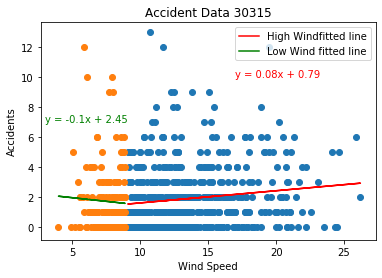

In [61]:
# high wind 30315
(slope, intercept, rvalue, pvalue, stderr) = linregress(HiWind30315['Wind Speed'], HiWind30315['Accident_ct'])
regress_values = slope * HiWind30315['Wind Speed'] + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(HiWind30315['Wind Speed'], HiWind30315['Accident_ct'])
plt.plot(HiWind30315['Wind Speed'], regress_values, color = 'red', label = "High Windfitted line")
plt.legend()
plt.annotate(line_eq,(17,10),fontsize=10,color="red")
plt.xlabel("Wind Speed")
plt.ylabel("Accidents")
plt.title("Accident Data 30315")
corr=round(st.pearsonr(HiWind30315['Wind Speed'], HiWind30315['Accident_ct'])[0],2)*100
print(f"The correlation between High Wind Speed and accidents for zip code 30315 is {corr}%")
print ("slope: %f  intercept: %f" % (slope, intercept))
print("R-Squared: %f" % rvalue**2)

#low wind 30315

(slope, intercept, rvalue, pvalue, stderr) = linregress(LoWind30315['Wind Speed'], LoWind30315['Accident_ct'])
regress_values = slope * LoWind30315['Wind Speed'] + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(LoWind30315['Wind Speed'], LoWind30315['Accident_ct'])
plt.plot(LoWind30315['Wind Speed'], regress_values, color = 'green',label = "Low Wind fitted line")
plt.legend()
plt.annotate(line_eq,(3,7),fontsize=10,color="green")
plt.xlabel("Wind Speed")
plt.ylabel("Accidents")
plt.title("Accident Data 30315")
corr=round(st.pearsonr(LoWind30315['Wind Speed'], LoWind30315['Accident_ct'])[0],2)*100
print(f"The correlation between Low Wind Speed and accidents for zip code 30315 is {corr}%")
print ("slope: %f  intercept: %f" % (slope, intercept))
print("R-Squared: %f" % rvalue**2)

The correlation between High Wind Speed and accidents for zip code 30309 is -2.0%
slope: -0.012830  intercept: 2.114952
R-Squared: 0.000429
The correlation between Low Wind Speed and accidents for zip code 30309 is -1.0%
slope: -0.025538  intercept: 2.304891
R-Squared: 0.000202


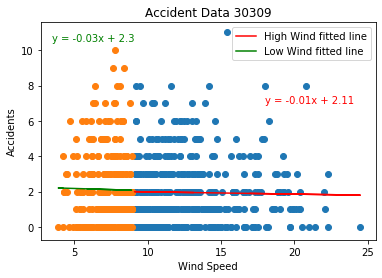

In [68]:
# high wind 30309
(slope, intercept, rvalue, pvalue, stderr) = linregress(HiWind30309['Wind Speed'], HiWind30309['Accident_ct'])
regress_values = slope * HiWind30309['Wind Speed'] + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(HiWind30309['Wind Speed'], HiWind30309['Accident_ct'])
plt.plot(HiWind30309['Wind Speed'], regress_values, color = 'red', label = "High Wind fitted line")
plt.legend()
plt.annotate(line_eq,(18,7),fontsize=10,color="red")
plt.xlabel("Wind Speed")
plt.ylabel("Accidents")
plt.title("Accident Data 30309")
corr=round(st.pearsonr(HiWind30309['Wind Speed'], HiWind30309['Accident_ct'])[0],2)*100
print(f"The correlation between High Wind Speed and accidents for zip code 30309 is {corr}%")
print ("slope: %f  intercept: %f" % (slope, intercept))
print("R-Squared: %f" % rvalue**2)

# low wind 30309

(slope, intercept, rvalue, pvalue, stderr) = linregress(LoWind30309['Wind Speed'], LoWind30309['Accident_ct'])
regress_values = slope * LoWind30309['Wind Speed'] + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(LoWind30309['Wind Speed'], LoWind30309['Accident_ct'])
plt.plot(LoWind30309['Wind Speed'], regress_values, color = 'green',label = "Low Wind fitted line")
plt.legend()
plt.annotate(line_eq,(3.5,10.5),fontsize=10,color="green")
plt.xlabel("Wind Speed")
plt.ylabel("Accidents")
plt.title("Accident Data 30309")
corr=round(st.pearsonr(LoWind30309['Wind Speed'], LoWind30309['Accident_ct'])[0],2)*100
print(f"The correlation between Low Wind Speed and accidents for zip code 30309 is {corr}%")
print ("slope: %f  intercept: %f" % (slope, intercept))
print("R-Squared: %f" % rvalue**2)

The correlation between High Wind Speed and accidents for zip code 30340 is 5.0%
slope: 0.025217  intercept: 1.146180
R-Squared: 0.002214
The correlation between Low Wind Speed and accidents for zip code 30340 is -7.000000000000001%
slope: -0.142297  intercept: 2.574066
R-Squared: 0.005240


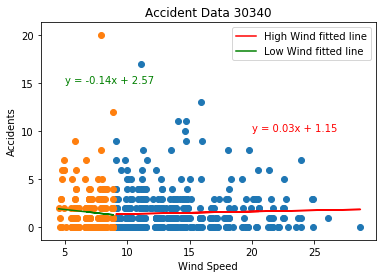

In [72]:
# high wind 30340
(slope, intercept, rvalue, pvalue, stderr) = linregress(HiWind30340['Wind Speed'], HiWind30340['Accident_ct'])
regress_values = slope * HiWind30340['Wind Speed'] + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(HiWind30340['Wind Speed'], HiWind30340['Accident_ct'])
plt.plot(HiWind30340['Wind Speed'], regress_values, color = 'red', label = "High Wind fitted line")
plt.legend()
plt.annotate(line_eq,(20,10),fontsize=10,color="red")
plt.xlabel("Wind Speed")
plt.ylabel("Accidents")
plt.title("Accident Data 30340")
corr=round(st.pearsonr(HiWind30340['Wind Speed'], HiWind30340['Accident_ct'])[0],2)*100
print(f"The correlation between High Wind Speed and accidents for zip code 30340 is {corr}%")
print ("slope: %f  intercept: %f" % (slope, intercept))
print("R-Squared: %f" % rvalue**2)

# low wind 30340

(slope, intercept, rvalue, pvalue, stderr) = linregress(LoWind30340['Wind Speed'], LoWind30340['Accident_ct'])
regress_values = slope * LoWind30340['Wind Speed'] + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(LoWind30340['Wind Speed'], LoWind30340['Accident_ct'])
plt.plot(LoWind30340['Wind Speed'], regress_values, color = 'green',label = "Low Wind fitted line")
plt.legend()
plt.annotate(line_eq,(5,15),fontsize=10,color="green")
plt.xlabel("Wind Speed")
plt.ylabel("Accidents")
plt.title("Accident Data 30340")
corr=round(st.pearsonr(LoWind30340['Wind Speed'], LoWind30340['Accident_ct'])[0],2)*100
print(f"The correlation between Low Wind Speed and accidents for zip code 30340 is {corr}%")
print ("slope: %f  intercept: %f" % (slope, intercept))
print("R-Squared: %f" % rvalue**2)

The correlation between High Wind Speed and accidents for zip code 30308 is -1.0%
slope: -0.004372  intercept: 1.692821
R-Squared: 0.000064
The correlation between Low Wind Speed and accidents for zip code 30308 is -7.000000000000001%
slope: -0.113655  intercept: 2.707241
R-Squared: 0.005125


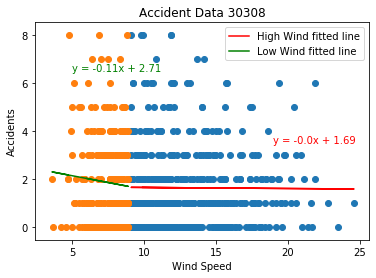

In [77]:
# high wind 30308
(slope, intercept, rvalue, pvalue, stderr) = linregress(HiWind30308['Wind Speed'], HiWind30308['Accident_ct'])
regress_values = slope * HiWind30308['Wind Speed'] + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(HiWind30308['Wind Speed'], HiWind30308['Accident_ct'])
plt.plot(HiWind30308['Wind Speed'], regress_values, color = 'red', label = "High Wind fitted line")
plt.legend()
plt.annotate(line_eq,(19,3.5),fontsize=10,color="red")
plt.xlabel("Wind Speed")
plt.ylabel("Accidents")
plt.title("Accident Data 30308")
corr=round(st.pearsonr(HiWind30308['Wind Speed'], HiWind30308['Accident_ct'])[0],2)*100
print(f"The correlation between High Wind Speed and accidents for zip code 30308 is {corr}%")
print ("slope: %f  intercept: %f" % (slope, intercept))
print("R-Squared: %f" % rvalue**2)

#low wind 30308

(slope, intercept, rvalue, pvalue, stderr) = linregress(LoWind30308['Wind Speed'], LoWind30308['Accident_ct'])
regress_values = slope * LoWind30308['Wind Speed'] + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(LoWind30308['Wind Speed'], LoWind30308['Accident_ct'])
plt.plot(LoWind30308['Wind Speed'], regress_values, color = 'green',label = "Low Wind fitted line")
plt.legend()
plt.annotate(line_eq,(5,6.5),fontsize=10,color="green")
plt.xlabel("Wind Speed")
plt.ylabel("Accidents")
plt.title("Accident Data 30308")
corr=round(st.pearsonr(LoWind30308['Wind Speed'], LoWind30308['Accident_ct'])[0],2)*100
print(f"The correlation between Low Wind Speed and accidents for zip code 30308 is {corr}%")
print ("slope: %f  intercept: %f" % (slope, intercept))
print("R-Squared: %f" % rvalue**2)

The correlation between High Wind Speed and accidents for zip code 30324 is 4.0%
slope: 0.019713  intercept: 1.369850
R-Squared: 0.001264
The correlation between Low Wind Speed and accidents for zip code 30324 is -4.0%
slope: -0.070745  intercept: 2.242310
R-Squared: 0.001844


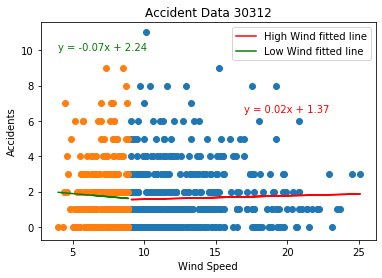

In [81]:
# high wind 30324
(slope, intercept, rvalue, pvalue, stderr) = linregress(HiWind30324['Wind Speed'], HiWind30324['Accident_ct'])
regress_values = slope * HiWind30324['Wind Speed'] + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(HiWind30324['Wind Speed'], HiWind30324['Accident_ct'])
plt.plot(HiWind30324['Wind Speed'], regress_values, color = 'red', label = "High Wind fitted line")
plt.legend()
plt.annotate(line_eq,(17,6.5),fontsize=10,color="red")
plt.xlabel("Wind Speed")
plt.ylabel("Accidents")
plt.title("Accident Data 30324")
corr=round(st.pearsonr(HiWind30324['Wind Speed'], HiWind30324['Accident_ct'])[0],2)*100
print(f"The correlation between High Wind Speed and accidents for zip code 30324 is {corr}%")
print ("slope: %f  intercept: %f" % (slope, intercept))
print("R-Squared: %f" % rvalue**2)

# low wind 30324

(slope, intercept, rvalue, pvalue, stderr) = linregress(LoWind30324['Wind Speed'], LoWind30324['Accident_ct'])
regress_values = slope * LoWind30324['Wind Speed'] + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(LoWind30324['Wind Speed'], LoWind30324['Accident_ct'])
plt.plot(LoWind30324['Wind Speed'], regress_values, color = 'green',label = "Low Wind fitted line")
plt.legend()
plt.annotate(line_eq,(4,10),fontsize=10,color="green")
plt.xlabel("Wind Speed")
plt.ylabel("Accidents")
plt.title("Accident Data 30312")
corr=round(st.pearsonr(LoWind30324['Wind Speed'], LoWind30324['Accident_ct'])[0],2)*100
print(f"The correlation between Low Wind Speed and accidents for zip code 30324 is {corr}%")
print ("slope: %f  intercept: %f" % (slope, intercept))
print("R-Squared: %f" % rvalue**2)

The correlation between High Wind Speed and accidents for zip code 30342 is 2.0%
slope: 0.008328  intercept: 0.969430
R-Squared: 0.000483
The correlation between Low Wind Speed and accidents for zip code 30342 is 3.0%
slope: 0.036447  intercept: 0.808398
R-Squared: 0.000918


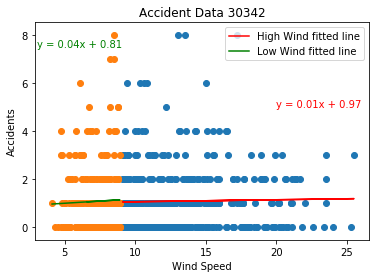

In [83]:
# high wind 30342
(slope, intercept, rvalue, pvalue, stderr) = linregress(HiWind30342['Wind Speed'], HiWind30342['Accident_ct'])
regress_values = slope * HiWind30342['Wind Speed'] + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(HiWind30342['Wind Speed'], HiWind30342['Accident_ct'])
plt.plot(HiWind30342['Wind Speed'], regress_values, color = 'red', label = "High Wind fitted line")
plt.legend()
plt.annotate(line_eq,(20,5),fontsize=10,color="red")
plt.xlabel("Wind Speed")
plt.ylabel("Accidents")
plt.title("Accident Data 30342")
corr=round(st.pearsonr(HiWind30342['Wind Speed'], HiWind30342['Accident_ct'])[0],2)*100
print(f"The correlation between High Wind Speed and accidents for zip code 30342 is {corr}%")
print ("slope: %f  intercept: %f" % (slope, intercept))
print("R-Squared: %f" % rvalue**2)

# low wind 30345

(slope, intercept, rvalue, pvalue, stderr) = linregress(LoWind30342['Wind Speed'], LoWind30342['Accident_ct'])
regress_values = slope * LoWind30342['Wind Speed'] + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(LoWind30342['Wind Speed'], LoWind30342['Accident_ct'])
plt.plot(LoWind30342['Wind Speed'], regress_values, color = 'green',label = "Low Wind fitted line")
plt.legend()
plt.annotate(line_eq,(3,7.5),fontsize=10,color="green")
plt.xlabel("Wind Speed")
plt.ylabel("Accidents")
plt.title("Accident Data 30342")
corr=round(st.pearsonr(LoWind30342['Wind Speed'], LoWind30342['Accident_ct'])[0],2)*100
print(f"The correlation between Low Wind Speed and accidents for zip code 30342 is {corr}%")
print ("slope: %f  intercept: %f" % (slope, intercept))
print("R-Squared: %f" % rvalue**2)

The correlation between High Wind Speed and accidents for zip code 30318 is 9.0%
slope: 0.039426  intercept: 0.673280
R-Squared: 0.008004
The correlation between Low Wind Speed and accidents for zip code 30318 is -9.0%
slope: -0.123909  intercept: 2.272880
R-Squared: 0.008773


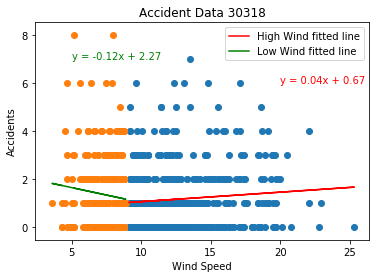

In [86]:
# high wind 30318
(slope, intercept, rvalue, pvalue, stderr) = linregress(HiWind30318['Wind Speed'], HiWind30318['Accident_ct'])
regress_values = slope * HiWind30318['Wind Speed'] + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(HiWind30318['Wind Speed'], HiWind30318['Accident_ct'])
plt.plot(HiWind30318['Wind Speed'], regress_values, color = 'red', label = "High Wind fitted line")
plt.legend()
plt.annotate(line_eq,(20,6),fontsize=10,color="red")
plt.xlabel("Wind Speed")
plt.ylabel("Accidents")
plt.title("Accident Data 30318")
corr=round(st.pearsonr(HiWind30318['Wind Speed'], HiWind30318['Accident_ct'])[0],2)*100
print(f"The correlation between High Wind Speed and accidents for zip code 30318 is {corr}%")
print ("slope: %f  intercept: %f" % (slope, intercept))
print("R-Squared: %f" % rvalue**2)

#low wind 30318

(slope, intercept, rvalue, pvalue, stderr) = linregress(LoWind30318['Wind Speed'], LoWind30318['Accident_ct'])
regress_values = slope * LoWind30318['Wind Speed'] + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(LoWind30318['Wind Speed'], LoWind30318['Accident_ct'])
plt.plot(LoWind30318['Wind Speed'], regress_values, color = 'green',label = "Low Wind fitted line")
plt.legend()
plt.annotate(line_eq,(5,7),fontsize=10,color="green")
plt.xlabel("Wind Speed")
plt.ylabel("Accidents")
plt.title("Accident Data 30318")
corr=round(st.pearsonr(LoWind30318['Wind Speed'], LoWind30318['Accident_ct'])[0],2)*100
print(f"The correlation between Low Wind Speed and accidents for zip code 30318 is {corr}%")
print ("slope: %f  intercept: %f" % (slope, intercept))
print("R-Squared: %f" % rvalue**2)